### Difference Between RooCrystalBall and RooCBShape:

RooCrystalBall: This function combines a Gaussian core with an exponential tail, providing a flexible shape that can model distributions with heavy tails. The parameters (like alpha and n) allow for fine-tuning of the tail shape, which makes it suitable for fitting distributions with asymmetric tails often seen in experimental data.

RooCBShape: This is a simpler version of the Crystal Ball shape and typically is used to fit data with a single-sided tail. It does not include as much flexibility as the RooCrystalBall. The RooCBShape is more straightforward and is primarily used for situations where a symmetric shape around the peak is sufficient, without needing to model the extended tails effectively.

Welcome to JupyROOT 6.26/06


Info in <TCanvas::Print>: png file CrystalBallPdfPlot.png has been created


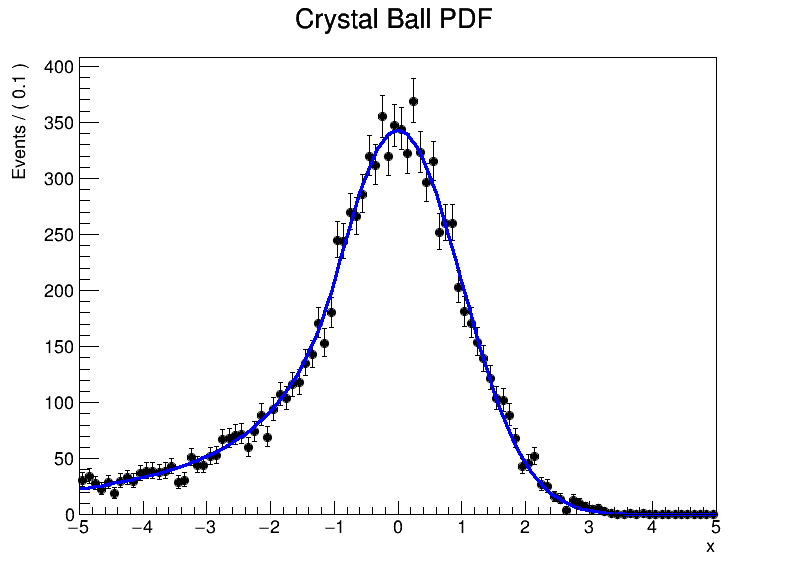

In [1]:
import ROOT
from ROOT import RooFit, RooRealVar, RooCrystalBall
from IPython.display import Image, display

# Define the variable x
x = ROOT.RooRealVar("x", "x", -5, 5)  # Range for the variable x

# Define parameters for the Crystal Ball function
mean = ROOT.RooRealVar("mean", "mean", 0, -5, 5)          # Mean
sigma = ROOT.RooRealVar("sigma", "sigma", 1, 0.1, 5)     # Width (standard deviation)
alpha = ROOT.RooRealVar("alpha", "alpha", 1, 0, 5)       # Power for the tail
n = ROOT.RooRealVar("n", "n", 2, 1, 5)                   # Number of times the tail goes to zero

# Create a Crystal Ball PDF
crystal_ball_pdf = RooCrystalBall("crystal_ball_pdf", "Crystal Ball PDF", x, mean, sigma, alpha, n)

# Generate toy data from the Crystal Ball PDF
data = crystal_ball_pdf.generate(ROOT.RooArgSet(x), 10000)

# Create a frame for plotting
xframe = x.frame(RooFit.Title("Crystal Ball PDF"))

# Plot the generated data
data.plotOn(xframe)

# Plot the Crystal Ball PDF on the same frame
crystal_ball_pdf.plotOn(xframe)

# Create a canvas to draw the plot
c1 = ROOT.TCanvas("c1", "Crystal Ball PDF", 800, 600)
xframe.Draw()

# Save the plot as an image
c1.SaveAs("CrystalBallPdfPlot.png")

# Display the image in Jupyter notebook
display(Image(filename="CrystalBallPdfPlot.png"))
